## Importing Requirements

In [15]:
from imblearn.over_sampling import SMOTE

In [14]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import pytesseract
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
pip install  Pillow


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install pytesseract==0.2.7

In [6]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


## Image Preprocessing

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable (replace with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define the path to your folder
folder_path = r'D:\OneDrive\Desktop\bloodReportImages'

# Create a list to store image data
images = []

# Define image enhancement functions
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def down(image):
    return cv2.resize(img, (0, 0), fx=1.5, fy=1.5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the file is an image (you may want to add more robust checks)
    if file_path.endswith(('.jpg', '.jpeg', '.png')):
        # Open the image using OpenCV
        img = cv2.imread(file_path)

        # Apply image enhancement functions
        img = get_grayscale(img)
        img = thresholding(img)
        img=down(img)
        
        # Convert the image to PIL format
        img_pil = Image.fromarray(img)
        
        

        # Perform OCR on the enhanced image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(img_pil, config=custom_config)

        # Append the image data and extracted text to the list
        images.append({'image': img_pil, 'text': text})

# Now, 'images' is a list containing dictionaries with PIL Image objects and corresponding extracted text
# You can access individual images and text using indexing, e.g., images[0]['image'], images[0]['text']

# To display an image, you can use the following code
images[1]['image'].show()

# Print the extracted text from the sixth image
print(images[1]['text'])


In [107]:
print(images[3])

{'image': <PIL.Image.Image image mode=L size=1200x1560 at 0x2D78D1DE2C0>, 'text': 'LABSMART SAMPLE REPORT\n\nPatient Name: Maria Morrison\nInvestigations: Complete Blood Count (CBC)\n\nTest: Value: Unit: Reference:\n\nWhite Blood Cell Count (WBC) 9.3 cells/mm? 3.4-9.6 cells/mm? or cumm\nLymphocyte Percentage 41.8 Percentage (%) 20-40%\n\nMonocyte Percentage 7.3 Percentage (%) 2-8%\n\nNeutrophil Percentage 46.9 Percentage (%) 50-70%\n\nEosinophil Percentage 3.8 Percentage (%) 0-6%\n\nBasophil Percentage 04 Percentage (%) 0-1%\n\nLymphocyte Count 3.9 cells/mm* 1.0-3.0 cells/mm* or cumm\nMonocyte Count 0.7 cells/mm* 0.1-0.6 cells‘mm* or cumm\nNeutrophil Count 44 cells/mm* 1.8-7.7 cells‘mm* or cumm\nEosinophil Count 04 cells/mm* 0.0-0.4 cells‘mm* or cumm\nBasophil Count §.4e-79 cells/mm* 0.0-0.2 cells‘mm* or cumm\n\nRed Blood Cell Count (RBC) 463 cells/mm? 4.2-5.6 cells/mm or cumm\nHemoglobin Level 13.6 grams/dL 13.5-17.5 grams/dL\nHematocrit Level 40.5 Percentage (%) 38-50%\n\nMean Corpus

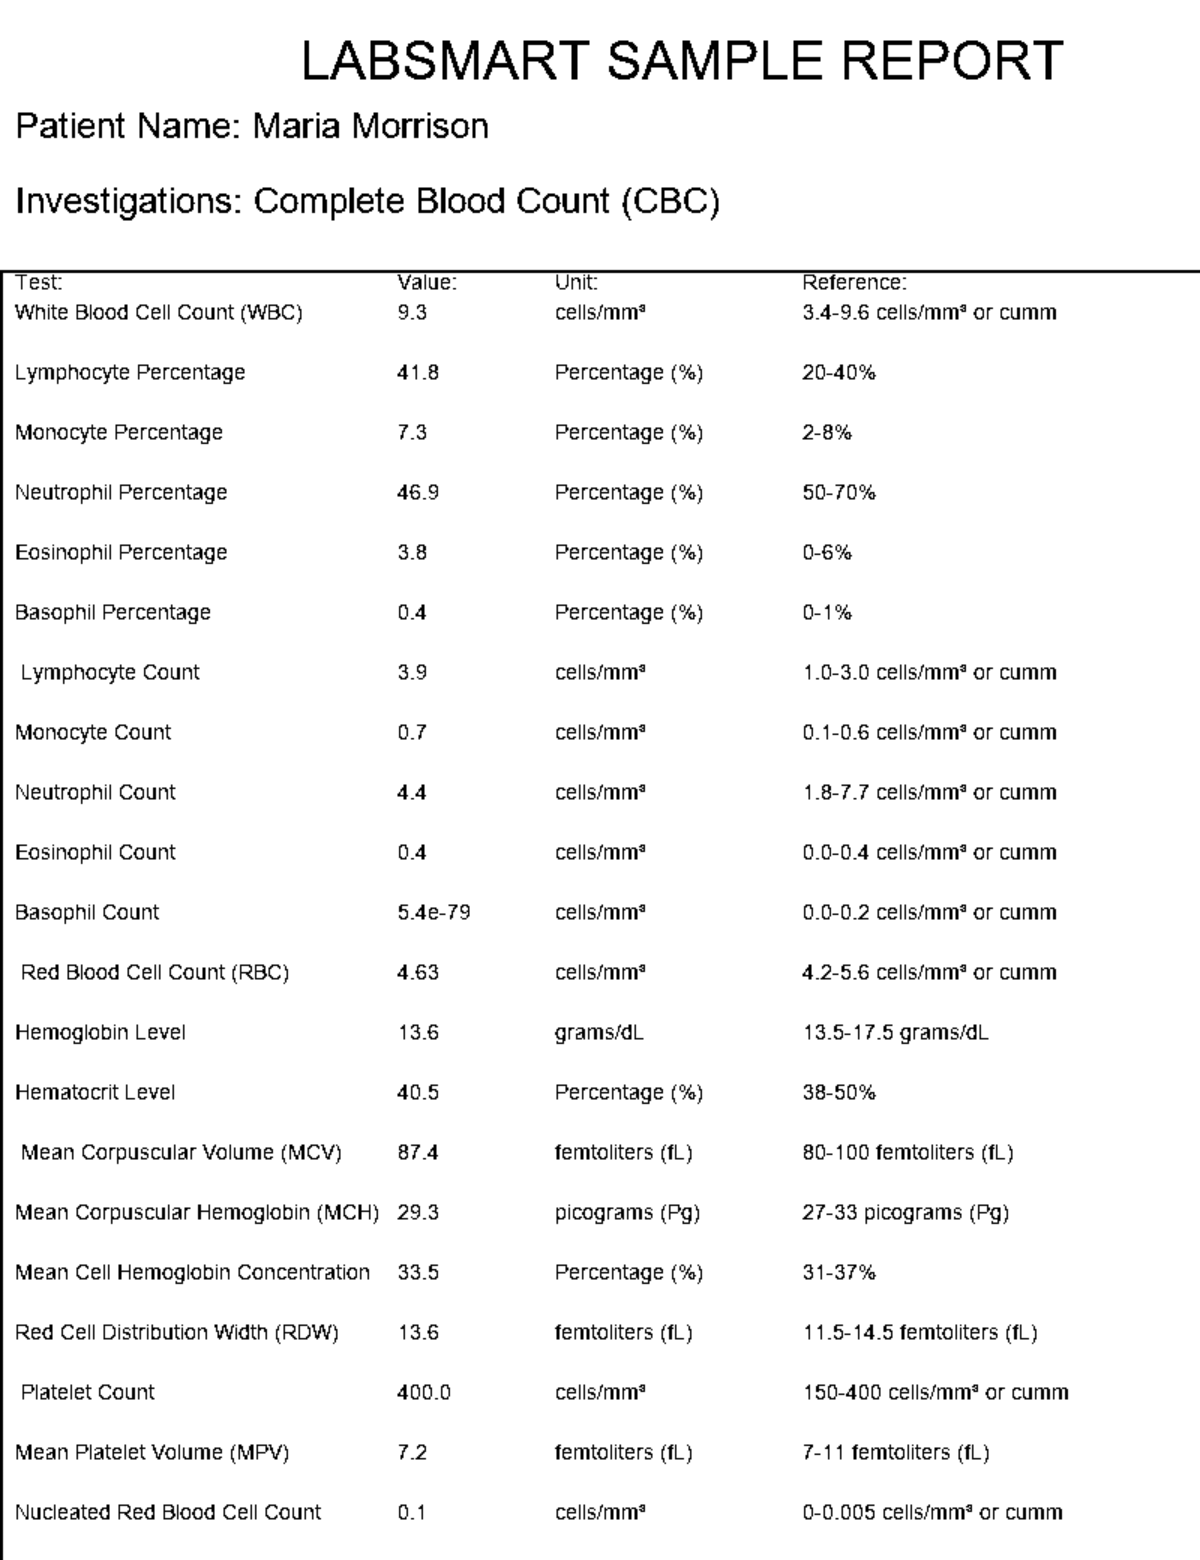

In [108]:
display(images[3]['image'])

In [109]:
print(images[2]['text'])

LABSMART SAMPLE REPORT

Patient Name: Keith Walker
Investigations: Complete Blood Count (CBC)

Test: Value: Unit: Reference:

White Blood Cell Count (WBC) 6.2 cells/mm? 3.4-9.6 cells/mm? or cumm
Lymphocyte Percentage 14.0 Percentage (%) 20-40%

Monocyte Percentage 14.9 Percentage (%) 2-8%

Neutrophil Percentage 69.3 Percentage (%) 50-70%

Eosinophil Percentage 1.5 Percentage (%) 0-6%

Basophil Percentage 0.5 Percentage (%) 0-1%

Lymphocyte Count 0.9 cells/mm* 1.0-3.0 cells/mm* or cumm
Monocyte Count 0.9 cells/mm* 0.1-0.6 cells‘mm* or cumm
Neutrophil Count 43 cells/mm* 1.8-7.7 cells‘mm* or cumm
Eosinophil Count 0.1 cells/mm* 0.0-0.4 cells‘mm* or cumm
Basophil Count §.4e-79 cells/mm* 0.0-0.2 cells‘mm* or cumm

Red Blood Cell Count (RBC) 475 cells/mm? 4.2-5.6 cells/mm or cumm
Hemoglobin Level 13.2 grams/dL 13.5-17.5 grams/dL
Hematocrit Level 39.8 Percentage (%) 38-50%

Mean Corpuscular Volume (MCV) 83.8 femtoliters (fL) 80-100 femtoliters (fL)
Mean Corpuscular Hemoglobin (MCH) 27.8 picogr

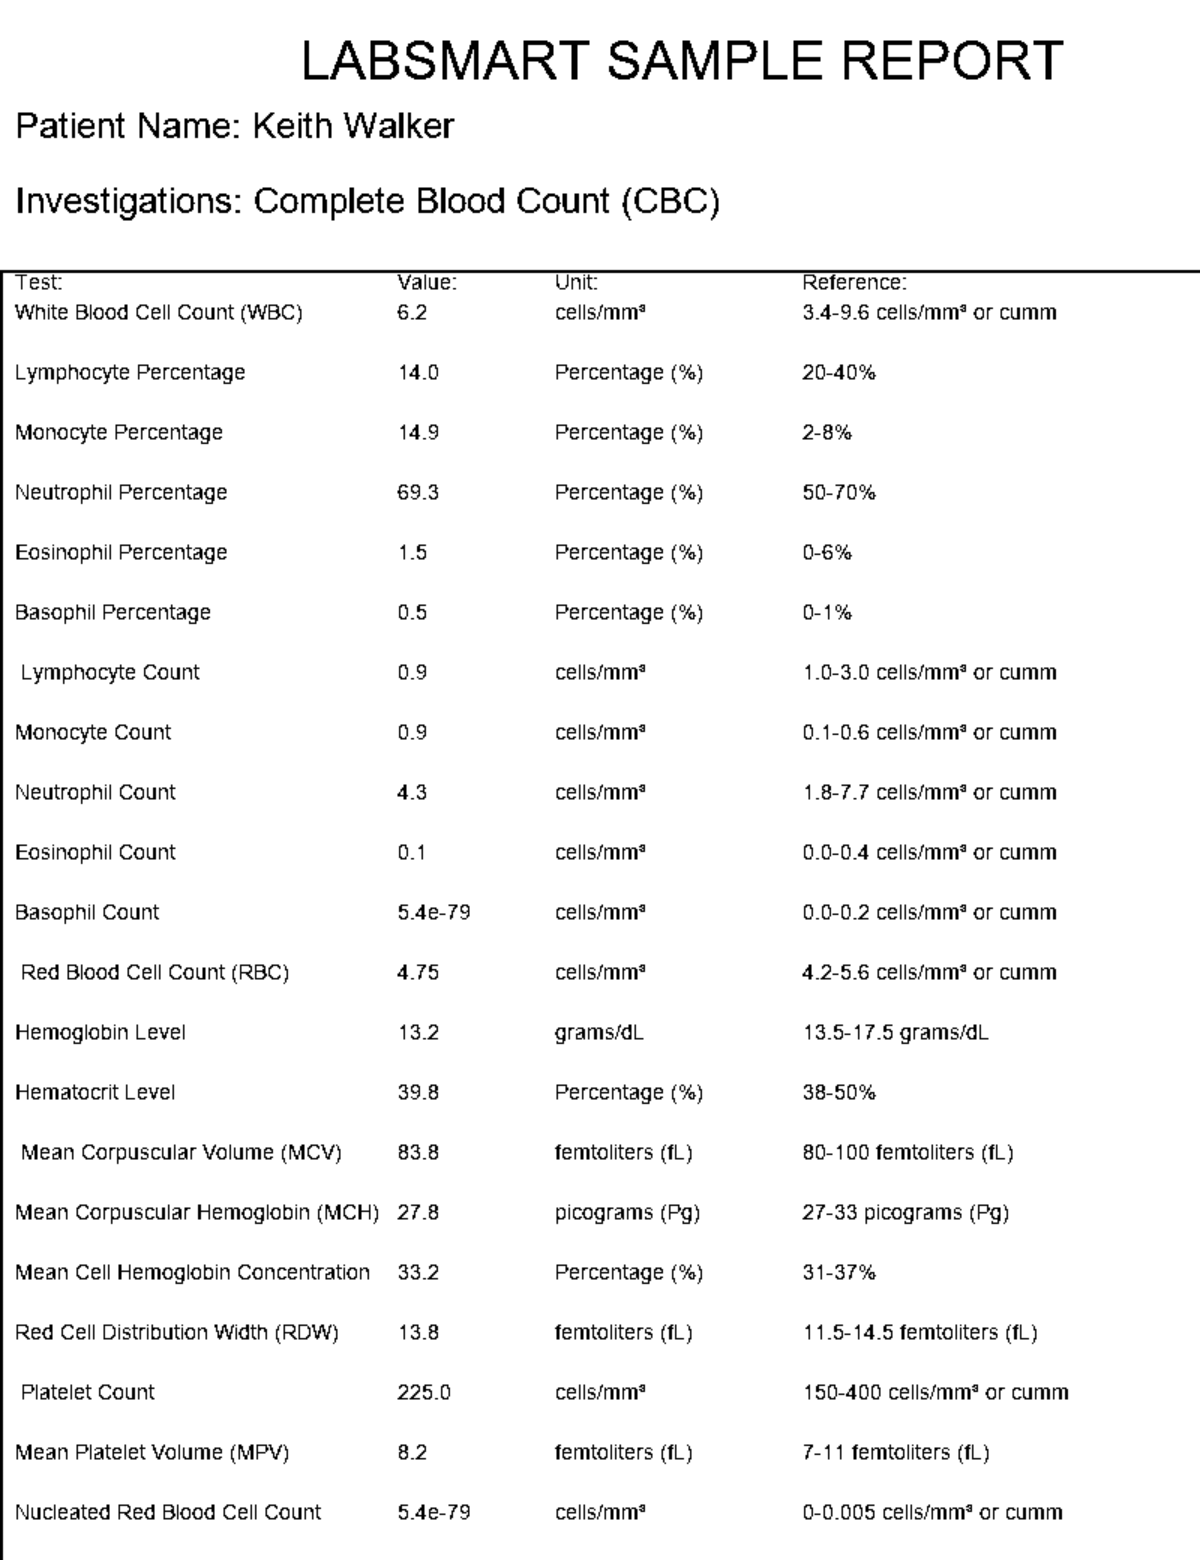

In [111]:
display(images[2]['image'])

## Using Python Regex to clean data

In [11]:
import re

**Code Details**:
The code uses a regex pattern to find matches in text data stored in a list of images. For each image, it extracts key-value pairs from the text, where keys are words starting with an uppercase letter, and values are associated numerical values. The results are stored in a dictionary for each image. The provided code aims to structure and organize information within the text data of images using regular expressions and dictionaries.

In [12]:
# Updated regex pattern to allow spaces in words
pattern = re.compile(r'\b([A-Z][a-zA-Z\s | a-zA-Z \(\w+\)\s ]+)\s+([0-9]+(?:\.[0-9]+)? | [0-9]+(?:\.[0-9]+)?e?-?[0-9]+?)')


for i in range(0,len(images)):
    
    # Find all matches in the data
    matches = pattern.findall(images[i]['text'])
    dict1={}
    # Print the result
    for match in matches:
        key = match[0].strip()
        if key not in dict1:
            dict1[key] = match[1]  # Initialize an empty list for the key if it doesn't exist
  
        
    images[i]['text']=dict1    
 

In [13]:
print(images[2]['text'])

{'White Blood Cell Count (WBC)': '6.2 ', 'Lymphocyte Percentage': '14.0 ', 'Monocyte Percentage': '14.9 ', 'Neutrophil Percentage': '69.3 ', 'Eosinophil Percentage': '1.5 ', 'Basophil Percentage': '0.5 ', 'Lymphocyte Count': '0.9 ', 'Monocyte Count': '0.9 ', 'Neutrophil Count': '43 ', 'Eosinophil Count': '0.1 ', 'Red Blood Cell Count (RBC)': '475 ', 'Hemoglobin Level': '13.2 ', 'Hematocrit Level': '39.8 ', 'Mean Corpuscular Volume (MCV)': '83.8 ', 'Mean Corpuscular Hemoglobin (MCH)': '27.8 ', 'Pg)\nMean Cell Hemoglobin Concentration': '33.2 ', 'Red Cell Distribution Width (RDW)': '13.8 ', 'Platelet Count': '225.0 ', 'Mean Platelet Volume (MPV)': '8.2 '}


**Creating Columns of Dataframe**

In [15]:
df_columns=['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', ' Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count ', 'Basophil Count',
       ' Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       ' Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', ' Platelet Count',
       'Mean Platelet Volume (MPV)', 'Nucleated Red Blood Cell Count']

In [16]:
df= pd.DataFrame(columns=df_columns)

In [17]:
df

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),Nucleated Red Blood Cell Count


In [18]:
for i in images[0:8]:
    print(i['text'])
    print('\n\n')

{'White Blood Cell Count (WBC)': '8.2 ', 'Lymphocyte Percentage': '28.6 ', 'Monocyte Percentage': '5.8 ', 'Neutrophil Percentage': '64.0 ', 'Eosinophil Percentage': '1.2 ', 'Basophil Percentage': '0.5 ', 'Lymphocyte Count': '2.3 ', 'Monocyte Count': '0.5 ', 'Eosinophil Count': '0.1 ', 'Hemoglobin Level': '15.5 ', 'Hematocrit Level': '45.2 ', 'Mean Corpuscular Volume (MCV)': '85.9 ', 'Mean Corpuscular Hemoglobin (MCH)': '29.5 ', 'Pg)\nMean Cell Hemoglobin Concentration': '34.4 ', 'Red Cell Distribution Width (RDW)': '12.6 ', 'Platelet Count': '263.0 ', 'Mean Platelet Volume (MPV)': '7.2 ', 'Nucleated Red Blood Cell Count': '0.1 '}



{'White Blood Cell Count (WBC)': '8.0 ', 'Lymphocyte Percentage': '29.6 ', 'Monocyte Percentage': '7.8 ', 'Neutrophil Percentage': '60.1 ', 'Eosinophil Percentage': '2.0 ', 'Basophil Percentage': '0.7 ', 'Lymphocyte Count': '24 ', 'Monocyte Count': '06 ', 'Neutrophil Count': '48 ', 'Eosinophil Count': '0.2 ', 'Basophil Count': '0.1 ', 'Red Blood Cell Count 

## Function to check if two strings are close match and return the closest match

In [19]:
pip install --upgrade numpy


**Code Details**:The function most_close_column determines the column in a DataFrame (df_columns) that is most similar to a given key, considering lowercase versions and using the Levenshtein edit distance. It iterates through the DataFrame columns, calculates the edit distance between lowercase versions of the current column and key, and returns the column with the minimum distance, provided it is below a specified threshold. The goal is to find the closest matching column in terms of text similarity.


In [ ]:
from nltk.metrics import edit_distance
from nltk.tokenize import word_tokenize

def most_close_column(key, df_columns, threshold=3):
    closest_column = None
    min_distance = float('inf')

    for col in df_columns:
        col_lower = col.lower()
        key_lower = key.lower()

        words1 = set(word_tokenize(col_lower))
        words2 = set(word_tokenize(key_lower))

        common_words = words1.intersection(words2)
        distance = edit_distance(col_lower, key_lower)

        if distance < min_distance or bool(common_words) and distance == min_distance:
            closest_column = col
            min_distance = distance

    return closest_column

## Creating a dataframe

In [21]:
images[1]['text']

{'White Blood Cell Count (WBC)': '8.0 ',
 'Lymphocyte Percentage': '29.6 ',
 'Monocyte Percentage': '7.8 ',
 'Neutrophil Percentage': '60.1 ',
 'Eosinophil Percentage': '2.0 ',
 'Basophil Percentage': '0.7 ',
 'Lymphocyte Count': '24 ',
 'Monocyte Count': '06 ',
 'Neutrophil Count': '48 ',
 'Eosinophil Count': '0.2 ',
 'Basophil Count': '0.1 ',
 'Red Blood Cell Count (RBC)': '462 ',
 'Hemoglobin Level': '14.0 ',
 'Hematocrit Level': '40.2 ',
 'Mean Corpuscular Volume (MCV)': '87.0 ',
 'Mean Corpuscular Hemoglobin (MCH)': '30.3 ',
 'Pg)\nMean Cell Hemoglobin Concentration': '34.8 ',
 'Red Cell Distribution Width (RDW)': '14.8 ',
 'Platelet Count': '207.0 ',
 'Mean Platelet Volume (MPV)': '8.4 ',
 'Nucleated Red Blood Cell Count': '06 '}

In [22]:
images[3]['text']

{'White Blood Cell Count (WBC)': '9.3 ',
 'Lymphocyte Percentage': '41.8 ',
 'Monocyte Percentage': '7.3 ',
 'Neutrophil Percentage': '46.9 ',
 'Eosinophil Percentage': '3.8 ',
 'Basophil Percentage': '04 ',
 'Lymphocyte Count': '3.9 ',
 'Monocyte Count': '0.7 ',
 'Neutrophil Count': '44 ',
 'Eosinophil Count': '04 ',
 'Red Blood Cell Count (RBC)': '463 ',
 'Hemoglobin Level': '13.6 ',
 'Hematocrit Level': '40.5 ',
 'Mean Corpuscular Volume (MCV)': '87.4 ',
 'Mean Corpuscular Hemoglobin (MCH)': '29.3 ',
 'Pg)\nMean Cell Hemoglobin Concentration': '33.5 ',
 'Red Cell Distribution Width (RDW)': '13.6 ',
 'Platelet Count': '400.0 ',
 'Mean Platelet Volume (MPV)': '7.2 ',
 'Nucleated Red Blood Cell Count': '0.1 '}

**Code Details**:This code iterates through each image in the images list and, for each key-value pair in the 'text' dictionary of the image, it finds the most similar column in the DataFrame (df) using the most_close_column function. If a match is found, it adds the key's value to the corresponding column in the DataFrame. The result is then printed.

In [23]:
# Iterate through each dictionary in list1
count=0
for img in images:
    # Iterate through each key-value pair in the dictionary
    for key, value in img['text'].items():
        # Check if even a part of the key is present in df_columns
        matching_column = most_close_column(key.lower(),df.columns)
        print('key:',key, 'Value:',value,'COl:',matching_column)

        # If there's a match, add the key's value to the corresponding column(s)
        if matching_column :
            df.at[count, matching_column] = value  # Assuming you want to add values to the first row of the DataFrame
            
    count +=1        

# Print the resulting DataFrame 
print(df)

key: White Blood Cell Count (WBC) Value: 8.2  COl: White Blood Cell Count (WBC)
key: Lymphocyte Percentage Value: 28.6  COl: Lymphocyte Percentage
key: Monocyte Percentage Value: 5.8  COl: Monocyte Percentage
key: Neutrophil Percentage Value: 64.0  COl: Neutrophil Percentage
key: Eosinophil Percentage Value: 1.2  COl: Eosinophil Percentage
key: Basophil Percentage Value: 0.5  COl: Basophil Percentage
key: Lymphocyte Count Value: 2.3  COl:  Lymphocyte Count
key: Monocyte Count Value: 0.5  COl: Monocyte Count
key: Eosinophil Count Value: 0.1  COl: Eosinophil Count 
key: Hemoglobin Level Value: 15.5  COl: Hemoglobin Level
key: Hematocrit Level Value: 45.2  COl: Hematocrit Level
key: Mean Corpuscular Volume (MCV) Value: 85.9  COl:  Mean Corpuscular Volume (MCV)
key: Mean Corpuscular Hemoglobin (MCH) Value: 29.5  COl: Mean Corpuscular Hemoglobin (MCH)
key: Pg)
Mean Cell Hemoglobin Concentration Value: 34.4  COl: Mean Cell Hemoglobin Concentration
key: Red Cell Distribution Width (RDW) Value

In [24]:
df.head()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),Nucleated Red Blood Cell Count
0,8.2,28.6,5.8,64.0,1.2,0.5,2.3,0.5,NaN,0.1,...,NaN,15.5,45.2,85.9,29.5,34.4,12.6,263.0,7.2,0.1
1,8.0,29.6,7.8,60.1,2.0,0.7,24,06,48,0.2,...,462,14.0,40.2,87.0,30.3,34.8,14.8,207.0,8.4,06
2,6.2,14.0,14.9,69.3,1.5,0.5,0.9,0.9,43,0.1,...,475,13.2,39.8,83.8,27.8,33.2,13.8,225.0,8.2,NaN
3,9.3,41.8,7.3,46.9,3.8,04,3.9,0.7,44,04,...,463,13.6,40.5,87.4,29.3,33.5,13.6,400.0,7.2,0.1
4,66,80.4,8.7,39.3,14,0.7,3.3,06,26,0.1,...,4.01,11.6,33.6,83.8,28.9,34.5,13.4,300.0,69,0.1


In [25]:
df.tail()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),Nucleated Red Blood Cell Count
38,5.9,46.4,9.5,426,1.5,1.2,27,06,25,0.1,...,NaN,15.0,44.8,87.4,29.2,33.4,15.5,217.0,8.2,0.1
39,47,34.1,67,NaN,0.9,0.9,16,0.3,27,NaN,...,442,12.8,37.9,85.9,28.9,33.6,13.2,329.0,NaN,0.1
40,6.5,28.1,6.5,62.9,2.2,0.5,1.8,04,44,0.1,...,47,13.0,38.0,80.7,27.7,34.4,13.1,247.0,77,NaN
41,76,NaN,74,33.4,5.9,0.8,4.0,0.5,25,04,...,45,124,36.4,80.9,27.6,34.2,13.9,355.0,74,0.1
42,44,NaN,9.5,34.3,2.9,16,24,04,14,0.1,...,4.27,12.6,36.4,85.4,29.4,34.4,11.4,317.0,8.1,0.1


In [1]:
import pandas as pd
df= pd.read_csv('blood_reports_extracted.csv')

## EXPLORATORY DATA ANALYSIS

## 1. Data Exploration

**Looking at first 5 rows of the dataset**

In [2]:
df.head()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,Basophil Count,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV)
0,10.7,30.3,77.0,60.0,16.0,0.5,3.2,0.8,64.0,0.2,0.1,4.91,13.3,40.3,82.0,27.1,33.0,14.0,262.0,86.0
1,43.0,30.0,127.0,31.8,1.3,4.0,2.3,0.5,14.0,0.1,0.1,4.24,11.8,37.2,87.8,27.8,31.6,15.2,292.0,8.2
2,6.0,42.9,9.8,42.8,44.0,0.5,26.0,6.0,26.0,0.2,0.1,4.19,13.3,39.6,94.6,31.7,33.5,13.2,299.0,8.2
3,7.0,41.0,9.4,47.9,14.0,1.0,2.9,6.0,3.4,0.1,0.1,4.52,15.3,44.0,97.4,33.9,34.8,13.4,289.0,65.0
4,6.5,30.5,96.0,87.3,16.0,14.0,2.0,6.0,3.7,0.1,0.1,5.73,14.2,43.9,76.7,24.8,32.4,14.7,159.0,96.0


**Number of rows and columns in dataset are : 146, 20 respectively**

In [3]:
df.shape

(6637, 20)

**Looking at the datatypes, non-null values in every column**

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   White Blood Cell Count (WBC)        6637 non-null   float64
 1   Lymphocyte Percentage               6637 non-null   float64
 2   Monocyte Percentage                 6637 non-null   float64
 3   Neutrophil Percentage               6637 non-null   float64
 4   Eosinophil Percentage               6637 non-null   float64
 5   Basophil Percentage                 6637 non-null   float64
 6   Lymphocyte Count                    6637 non-null   float64
 7   Monocyte Count                      6637 non-null   float64
 8   Neutrophil Count                    6637 non-null   float64
 9   Eosinophil Count                    6637 non-null   float64
 10  Basophil Count                      6637 non-null   float64
 11  Red Blood Cell Count (RBC)          6637 no

**Looking at various statistics for each column**

In [5]:
df.describe()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,Basophil Count,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV)
count,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.000000,6637.00000
mean,21.735965,57.578575,23.354196,90.943619,11.750881,2.931581,10.923505,2.496828,17.110283,0.583697,0.100844,101.332644,18.702818,87.523610,93.188730,29.070333,33.571041,20.357797,259.134850,30.43589
std,25.753570,87.242267,29.675139,128.646930,15.854976,4.023329,12.045616,2.654475,19.465942,1.441445,0.010236,183.064265,22.830239,128.268619,66.776809,2.537912,0.931755,26.392658,69.462073,33.13591
min,1.900000,5.000000,1.900000,8.400000,0.100000,0.100000,0.500000,0.100000,0.500000,0.100000,0.100000,2.530000,6.900000,23.000000,16.000000,12.400000,25.200000,11.300000,8.000000,5.50000
25%,6.300000,28.000000,7.200000,48.600000,2.000000,0.700000,2.000000,0.500000,3.400000,0.100000,0.100000,4.550000,12.900000,38.000000,83.100000,27.800000,33.000000,13.200000,211.000000,8.00000
50%,8.400000,33.500000,8.900000,60.000000,3.700000,0.900000,3.400000,0.800000,5.500000,0.200000,0.100000,4.900000,13.800000,40.700000,87.200000,29.300000,33.600000,13.600000,251.000000,8.80000
75%,29.000000,40.800000,12.900000,66.300000,17.000000,4.000000,24.000000,4.000000,27.000000,0.300000,0.100000,44.000000,15.000000,45.000000,91.000000,30.700000,34.200000,14.400000,300.000000,69.00000
max,127.000000,726.000000,244.000000,786.000000,274.000000,48.000000,76.000000,26.000000,147.000000,26.000000,0.500000,647.000000,127.000000,497.000000,777.000000,39.200000,38.300000,217.000000,818.000000,97.00000


**Percentage of missing values**

In [6]:
df.isnull().sum()

White Blood Cell Count (WBC)          0
Lymphocyte Percentage                 0
Monocyte Percentage                   0
Neutrophil Percentage                 0
Eosinophil Percentage                 0
Basophil Percentage                   0
Lymphocyte Count                      0
Monocyte Count                        0
Neutrophil Count                      0
Eosinophil Count                      0
Basophil Count                        0
Red Blood Cell Count (RBC)            0
Hemoglobin Level                      0
Hematocrit Level                      0
Mean Corpuscular Volume (MCV)         0
Mean Corpuscular Hemoglobin (MCH)     0
Mean Cell Hemoglobin Concentration    0
Red Cell Distribution Width (RDW)     0
Platelet Count                        0
Mean Platelet Volume (MPV)            0
dtype: int64

**Duplicate Values**

In [16]:
df.duplicated().sum()

0

**Looking at datatypes for each column** 

In [17]:
df.dtypes

White Blood Cell Count (WBC)          float64
Lymphocyte Percentage                 float64
Monocyte Percentage                   float64
Neutrophil Percentage                 float64
Eosinophil Percentage                 float64
Basophil Percentage                   float64
Lymphocyte Count                      float64
Monocyte Count                        float64
Neutrophil Count                      float64
Eosinophil Count                      float64
Basophil Count                        float64
Red Blood Cell Count (RBC)            float64
Hemoglobin Level                      float64
Hematocrit Level                      float64
Mean Corpuscular Volume (MCV)         float64
Mean Corpuscular Hemoglobin (MCH)     float64
Mean Cell Hemoglobin Concentration    float64
Red Cell Distribution Width (RDW)     float64
Platelet Count                        float64
Mean Platelet Volume (MPV)            float64
dtype: object

**Various columns in our dataset**

In [18]:
df.columns

Index(['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', 'Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count', 'Basophil Count',
       'Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       'Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', 'Platelet Count',
       'Mean Platelet Volume (MPV)'],
      dtype='object')

**Unique values in each column**

In [19]:
df.nunique()

White Blood Cell Count (WBC)          156
Lymphocyte Percentage                 502
Monocyte Percentage                   148
Neutrophil Percentage                 534
Eosinophil Percentage                 151
Basophil Percentage                    30
Lymphocyte Count                       75
Monocyte Count                         21
Neutrophil Count                      112
Eosinophil Count                       20
Basophil Count                          4
Red Blood Cell Count (RBC)            311
Hemoglobin Level                      119
Hematocrit Level                      262
Mean Corpuscular Volume (MCV)         418
Mean Corpuscular Hemoglobin (MCH)     190
Mean Cell Hemoglobin Concentration     80
Red Cell Distribution Width (RDW)     108
Platelet Count                        408
Mean Platelet Volume (MPV)             63
dtype: int64

In [117]:
df.columns

Index(['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', 'Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count', 'Basophil Count',
       'Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       'Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', 'Platelet Count',
       'Mean Platelet Volume (MPV)'],
      dtype='object')

# Visualizations

### Checking the distribution of all the columns in dataset

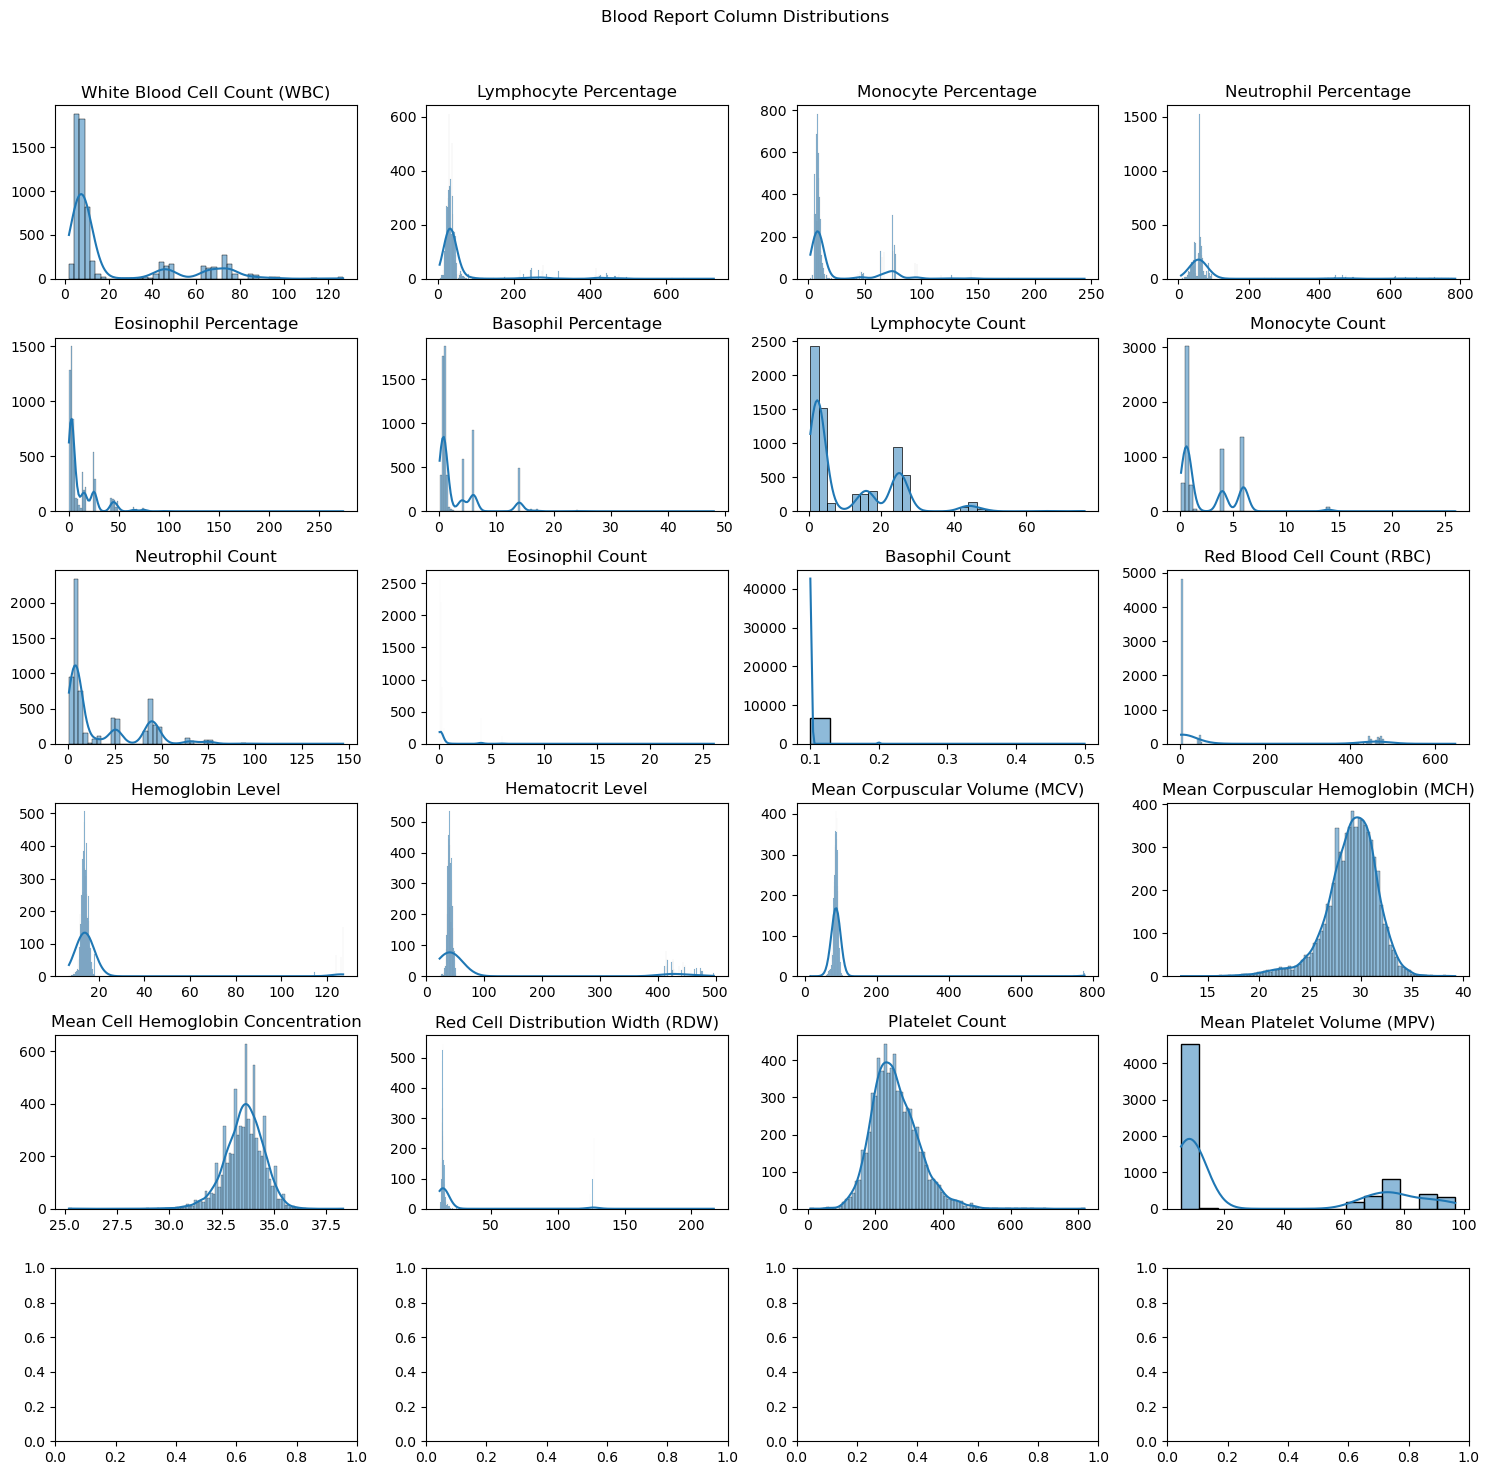

In [118]:
# Select relevant columns
selected_columns = df.columns

# Set up the subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
fig.suptitle('Blood Report Column Distributions')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Plotting Correlation Matrix

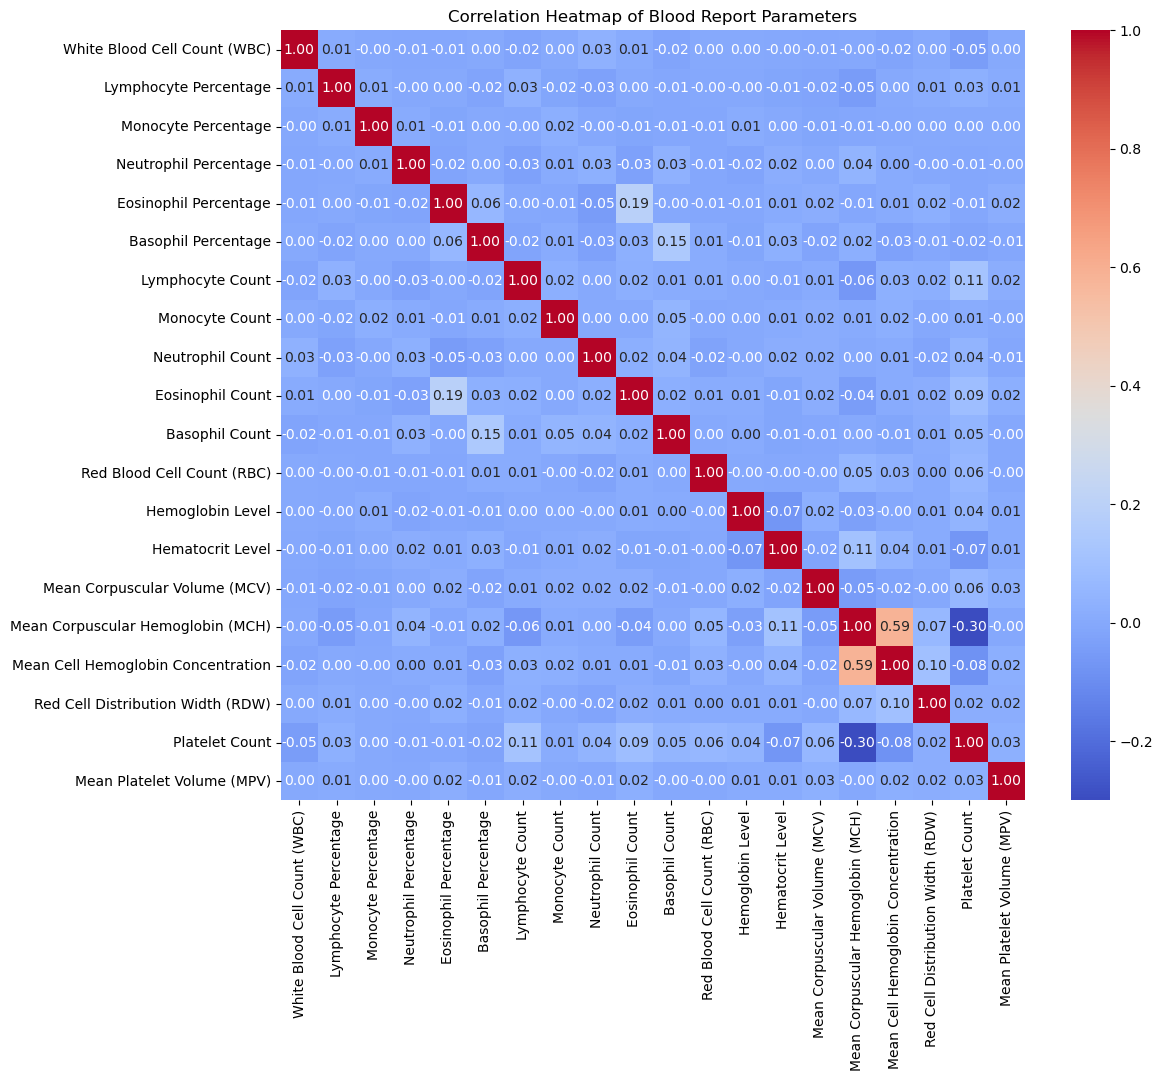

In [119]:
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Blood Report Parameters')
plt.show()


## 2. Data Cleansing and Validation

**Handling Null Values**

In [20]:
df.isnull().sum()

White Blood Cell Count (WBC)          0
Lymphocyte Percentage                 0
Monocyte Percentage                   0
Neutrophil Percentage                 0
Eosinophil Percentage                 0
Basophil Percentage                   0
Lymphocyte Count                      0
Monocyte Count                        0
Neutrophil Count                      0
Eosinophil Count                      0
Basophil Count                        0
Red Blood Cell Count (RBC)            0
Hemoglobin Level                      0
Hematocrit Level                      0
Mean Corpuscular Volume (MCV)         0
Mean Corpuscular Hemoglobin (MCH)     0
Mean Cell Hemoglobin Concentration    0
Red Cell Distribution Width (RDW)     0
Platelet Count                        0
Mean Platelet Volume (MPV)            0
dtype: int64

**Filling all the null values with the average of reference range**

In [21]:
reference_range = [
    "3.4-9.6", "20-40", "2-8", "50-70", "0-6", "0-1", "1.0-3.0", "0.1-0.6",
    "1.8-7.7", "0.0-0.4", "0.0-0.2", "4.2-5.6", "13.5-17.5", "38-50", "80-100",
    "27-33", "31-37", "11.5-14.5", "150-400", "7-11",'0-0.5'
]


# Split reference ranges into min and max values
ref_ranges = [tuple(map(float, rng.split('-'))) for rng in reference_range]

# Fill null values with the mean of the reference range
for col, (min_val, max_val) in zip(df.columns, ref_ranges):
    df[col] = df[col].fillna(np.mean([min_val, max_val]))

df.head()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,Basophil Count,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV)
0,10.7,30.3,77.0,60.0,16.0,0.5,3.2,0.8,64.0,0.2,0.1,4.91,13.3,40.3,82.0,27.1,33.0,14.0,262.0,86.0
1,43.0,30.0,127.0,31.8,1.3,4.0,2.3,0.5,14.0,0.1,0.1,4.24,11.8,37.2,87.8,27.8,31.6,15.2,292.0,8.2
2,6.0,42.9,9.8,42.8,44.0,0.5,26.0,6.0,26.0,0.2,0.1,4.19,13.3,39.6,94.6,31.7,33.5,13.2,299.0,8.2
3,7.0,41.0,9.4,47.9,14.0,1.0,2.9,6.0,3.4,0.1,0.1,4.52,15.3,44.0,97.4,33.9,34.8,13.4,289.0,65.0
4,6.5,30.5,96.0,87.3,16.0,14.0,2.0,6.0,3.7,0.1,0.1,5.73,14.2,43.9,76.7,24.8,32.4,14.7,159.0,96.0


In [22]:
df.isnull().sum()

White Blood Cell Count (WBC)          0
Lymphocyte Percentage                 0
Monocyte Percentage                   0
Neutrophil Percentage                 0
Eosinophil Percentage                 0
Basophil Percentage                   0
Lymphocyte Count                      0
Monocyte Count                        0
Neutrophil Count                      0
Eosinophil Count                      0
Basophil Count                        0
Red Blood Cell Count (RBC)            0
Hemoglobin Level                      0
Hematocrit Level                      0
Mean Corpuscular Volume (MCV)         0
Mean Corpuscular Hemoglobin (MCH)     0
Mean Cell Hemoglobin Concentration    0
Red Cell Distribution Width (RDW)     0
Platelet Count                        0
Mean Platelet Volume (MPV)            0
dtype: int64

In [23]:
len(df)

6637

**Converting columns to numeric columns**

In [24]:

# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')

In [25]:
df.dtypes

White Blood Cell Count (WBC)          float64
Lymphocyte Percentage                 float64
Monocyte Percentage                   float64
Neutrophil Percentage                 float64
Eosinophil Percentage                 float64
Basophil Percentage                   float64
Lymphocyte Count                      float64
Monocyte Count                        float64
Neutrophil Count                      float64
Eosinophil Count                      float64
Basophil Count                        float64
Red Blood Cell Count (RBC)            float64
Hemoglobin Level                      float64
Hematocrit Level                      float64
Mean Corpuscular Volume (MCV)         float64
Mean Corpuscular Hemoglobin (MCH)     float64
Mean Cell Hemoglobin Concentration    float64
Red Cell Distribution Width (RDW)     float64
Platelet Count                        float64
Mean Platelet Volume (MPV)            float64
dtype: object

## Outliers

**Visualizing Outliers**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

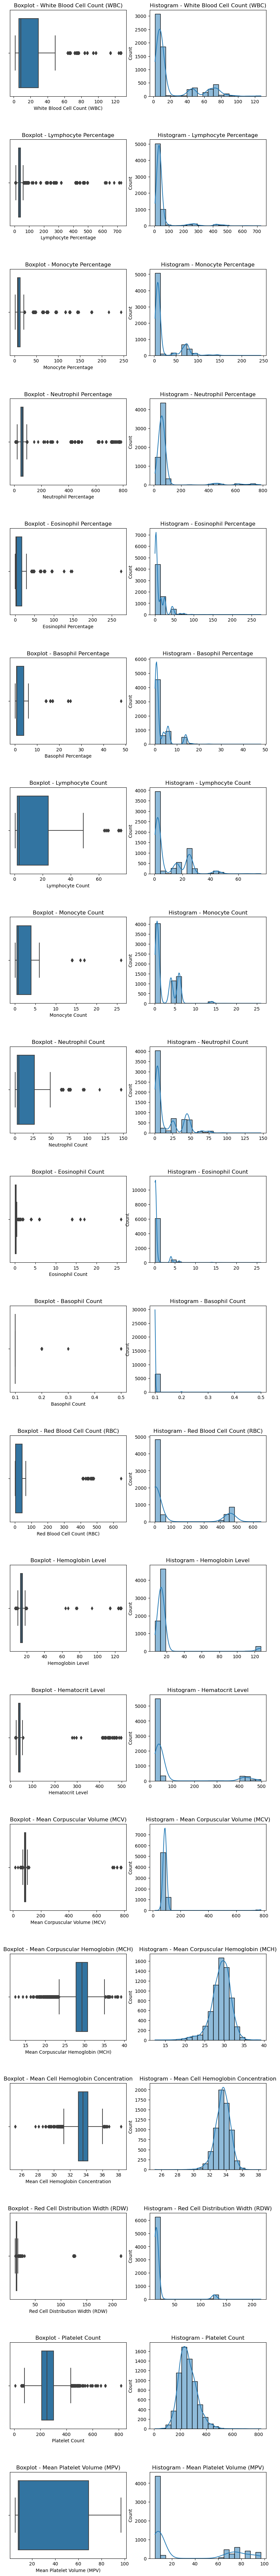

In [26]:
# Set up the matplotlib figure with individual subplots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(10, 5 * len(df.columns)))
fig.subplots_adjust(hspace=0.5)

# Plot box plots and histograms for each column
for i, col in enumerate(df.columns):
    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot - {col}')

    # Histogram
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram - {col}')
    axes[i, 1].set_xlabel(None)  # Remove x-axis label for better layout

plt.show()


### FInd all the values with abnormal reference values

In [27]:
# df.drop('Nucleated Red Blood Cell Count',inplace=True,axis=1)
# df.head()

## Stripping white spaces from column names

In [28]:
df.columns = df.columns.str.strip()

## Creating a dataframe where even if one value in a row goes out of range

**Code Details**:This code defines a function is_in_range to check if a given value is within a specified reference range. It then applies this function to each row of a DataFrame (df) to identify rows with values outside the reference ranges provided in the reference_range list. Finally, it prints the rows with out-of-range values and a DataFrame (no_disease_df) containing only the rows with values within the reference ranges.



In [29]:
import pandas as pd

# Assuming you have a DataFrame named df

reference_range = [
    "3.4-9.6",
    "20-40",
    "2-8",
    "50-70",
    "0-6",
    "0-1",
    "1.0-3.0",
    "0.1-0.6",
    "1.8-7.7",
    "0.0-0.4",
    "0.0-0.2",
    "4.2-5.6",
    "13.5-17.5",
    "38-50",
    "80-100",
    "27-33",
    "31-37",
    "11.5-14.5",
    "150-400",
    "7-11",

]

# Function to check if a value is within the reference range
def is_in_range(value, reference_range):
    min_value, max_value = map(float, reference_range.split('-'))
    return min_value <= value <= max_value

# Find rows with out-of-range v                  alues
out_of_range_rows = df.apply(lambda row: any(not is_in_range(value, ref) for value, ref in zip(row, reference_range)), axis=1)

# Display the rows with out-of-range values
out_of_range_data = df[out_of_range_rows]
no_disease_df = df[~out_of_range_rows]

print(out_of_range_data)


      White Blood Cell Count (WBC)  Lymphocyte Percentage  \
0                             10.7                   30.3   
1                             43.0                   30.0   
2                              6.0                   42.9   
3                              7.0                   41.0   
4                              6.5                   30.5   
...                            ...                    ...   
6632                           9.6                   36.8   
6633                           6.0                  626.0   
6634                          76.0                   48.5   
6635                           5.6                   30.7   
6636                          45.0                   38.4   

      Monocyte Percentage  Neutrophil Percentage  Eosinophil Percentage  \
0                    77.0                   60.0                   16.0   
1                   127.0                   31.8                    1.3   
2                     9.8                 

In [30]:
print(len(out_of_range_rows))
print(len(df))


6637
6637


In [31]:
out_of_range_data.head()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,Basophil Count,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV)
0,10.7,30.3,77.0,60.0,16.0,0.5,3.2,0.8,64.0,0.2,0.1,4.91,13.3,40.3,82.0,27.1,33.0,14.0,262.0,86.0
1,43.0,30.0,127.0,31.8,1.3,4.0,2.3,0.5,14.0,0.1,0.1,4.24,11.8,37.2,87.8,27.8,31.6,15.2,292.0,8.2
2,6.0,42.9,9.8,42.8,44.0,0.5,26.0,6.0,26.0,0.2,0.1,4.19,13.3,39.6,94.6,31.7,33.5,13.2,299.0,8.2
3,7.0,41.0,9.4,47.9,14.0,1.0,2.9,6.0,3.4,0.1,0.1,4.52,15.3,44.0,97.4,33.9,34.8,13.4,289.0,65.0
4,6.5,30.5,96.0,87.3,16.0,14.0,2.0,6.0,3.7,0.1,0.1,5.73,14.2,43.9,76.7,24.8,32.4,14.7,159.0,96.0


In [32]:
out_of_range_data.columns

Index(['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', 'Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count', 'Basophil Count',
       'Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       'Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', 'Platelet Count',
       'Mean Platelet Volume (MPV)'],
      dtype='object')

## Creating a 'disease' column in no_disease_df

In [33]:
no_disease_df['disease'] = 'Normal'

no_disease_df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12904\1234443531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_disease_df['disease'] = 'Normal'


,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),disease
1507,5.0,26.2,6.5,65.0,1.5,1.0,1.3,0.3,3.30,0.1,...,5.34,16.6,47.8,89.6,31.1,34.7,13.0,251.0,7.5,Normal
4230,6.2,35.1,8.0,60.0,1.2,0.9,2.2,0.5,3.40,0.1,...,4.90,15.4,45.8,86.8,29.2,33.6,14.3,269.0,9.0,Normal
4912,8.2,28.6,5.8,64.0,1.2,0.5,2.3,0.5,4.75,0.1,...,4.90,15.5,45.2,85.9,29.5,34.4,12.6,263.0,7.2,Normal
5482,6.3,37.3,5.4,56.3,6.0,0.5,2.3,0.3,3.50,0.2,...,4.90,15.1,44.3,84.2,28.8,34.2,13.0,340.0,9.0,Normal
5618,6.3,28.4,7.8,61.0,2.3,0.7,1.8,0.5,3.80,0.1,...,5.08,13.9,43.3,85.3,27.5,32.2,13.2,224.0,9.0,Normal


## Rules for defining diseases

**Code Details**:This code assigns disease labels to rows in the DataFrame out_of_range_data based on specific rules and reference ranges. The rules are defined for conditions related to blood test values, and if a row satisfies a rule, the corresponding disease label is assigned. This approach is useful for identifying potential health conditions based on blood test results.



In [34]:
reference_range = [
    "3.4-9.6",
    "20-40",
    "2-8",
    "50-70",
    "0-6",
    "0-1",
    "1.0-3.0",
    "0.1-0.6",
    "1.8-7.7",
    "0.0-0.4",
    "0.0-0.2",
    "4.2-5.6",
    "13.5-17.5",
    "38-50",
    "80-100",
    "27-33",
    "31-37",
    "11.5-14.5",
    "150-400",
    "7-11",
#     "0-0.005"
]




import pandas as pd


# Create a new column 'disease' with default value 'Unknown'
out_of_range_data['disease'] = 'Unknown'

# Disease Association Rules

# Rule 1: Anemia
anemia_condition = (out_of_range_data['Hemoglobin Level'] < 12) | (out_of_range_data['Hematocrit Level'] < 37)
out_of_range_data.loc[anemia_condition, 'disease'] = 'Anemia'

# Rule 2: Polycythemia Vera
polycythemia_condition = (out_of_range_data['Red Blood Cell Count (RBC)'] > 5.6) & (out_of_range_data['White Blood Cell Count (WBC)'] > 11)
out_of_range_data.loc[polycythemia_condition, 'disease'] = 'Polycythemia Vera'

# Rule 3: Infection
infection_condition = (out_of_range_data['White Blood Cell Count (WBC)'] > 10.8) & (out_of_range_data['Neutrophil Percentage'] > 74)
out_of_range_data.loc[infection_condition, 'disease'] = 'Infection'

# Rule 4: Thrombocytopenia
thrombocytopenia_condition = (out_of_range_data['Platelet Count'] < 150)
out_of_range_data.loc[thrombocytopenia_condition, 'disease'] = 'Thrombocytopenia'

# Rule 5: Thrombocytosis
thrombocytosis_condition = (out_of_range_data['Platelet Count'] > 400)
out_of_range_data.loc[thrombocytosis_condition, 'disease'] = 'Thrombocytosis'

# Rule 6: Iron Deficiency Anemia
iron_deficiency_condition = (out_of_range_data['Mean Corpuscular Hemoglobin (MCH)'] < 26)
out_of_range_data.loc[iron_deficiency_condition, 'disease'] = 'Iron Deficiency Anemia'

# Rule 7: Folate or Vitamin B12 Deficiency
deficiency_condition = (out_of_range_data['Mean Corpuscular Volume (MCV)'] > 100)
out_of_range_data.loc[deficiency_condition, 'disease'] = 'Folate or Vitamin B12 Deficiency'

# Rule 8: Chronic Leukemia
chronic_leukemia_condition = (out_of_range_data['White Blood Cell Count (WBC)'] > 9.6)
out_of_range_data.loc[chronic_leukemia_condition, 'disease'] = 'Chronic Leukemia'

# Rule 9: Aplastic Anemia
aplastic_anemia_condition = (out_of_range_data['Platelet Count'] < 150)
out_of_range_data.loc[aplastic_anemia_condition, 'disease'] = 'Aplastic Anemia'

# Rule 10: Megaloblastic Anemia
megaloblastic_anemia_condition = (out_of_range_data['Mean Corpuscular Volume (MCV)'] > 100) & (out_of_range_data['Hemoglobin Level'] < 12)
out_of_range_data.loc[megaloblastic_anemia_condition, 'disease'] = 'Megaloblastic Anemia'


# Create rules based on the provided reference range

# Rule 11: Low WBC and Low Lymphocyte Percentage indicate Immunodeficiency
immunodeficiency_condition = (out_of_range_data['White Blood Cell Count (WBC)'] < 3.4) & (out_of_range_data['Lymphocyte Percentage'] < 20)
out_of_range_data.loc[immunodeficiency_condition, 'disease'] = 'Immunodeficiency'

# Rule 12: High Neutrophil Percentage and High Platelet Count may indicate Inflammation or Infection
inflammation_condition = (out_of_range_data['Neutrophil Percentage'] > 70) & (out_of_range_data['Platelet Count'] > 400)
out_of_range_data.loc[inflammation_condition, 'disease'] = 'Inflammation or Infection'

# Rule 13: Low RBC and Low Hemoglobin may indicate Anemia
anemia_condition_2 = (out_of_range_data['Red Blood Cell Count (RBC)'] < 4.2) & (out_of_range_data['Hemoglobin Level'] < 13.5)
out_of_range_data.loc[anemia_condition_2, 'disease'] = 'Anemia'

# Rule 14: Elevated RDW along with Low MCV indicates Thalassemia
thalassemia_condition = (out_of_range_data['Red Cell Distribution Width (RDW)'] > 14.5) & (out_of_range_data['Mean Corpuscular Volume (MCV)'] < 80)
out_of_range_data.loc[thalassemia_condition, 'disease'] = 'Thalassemia'

# Rule 15: Elevated Eosinophil Percentage may indicate Allergies or Parasitic Infection
allergy_condition = (out_of_range_data['Eosinophil Percentage'] > 6)
out_of_range_data.loc[allergy_condition, 'disease'] = 'Allergies or Parasitic Infection'


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12904\3438886435.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_range_data['disease'] = 'Unknown'


In [35]:
out_of_range_data


,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),disease
0,10.7,30.3,77.0,60.0,16.0,0.5,3.2,0.8,64.0,0.2,...,4.91,13.3,40.3,82.0,27.1,33.0,14.0,262.0,86.0,Allergies or Parasitic Infection
1,43.0,30.0,127.0,31.8,1.3,4.0,2.3,0.5,14.0,0.1,...,4.24,11.8,37.2,87.8,27.8,31.6,15.2,292.0,8.2,Chronic Leukemia
2,6.0,42.9,9.8,42.8,44.0,0.5,26.0,6.0,26.0,0.2,...,4.19,13.3,39.6,94.6,31.7,33.5,13.2,299.0,8.2,Allergies or Parasitic Infection
3,7.0,41.0,9.4,47.9,14.0,1.0,2.9,6.0,3.4,0.1,...,4.52,15.3,44.0,97.4,33.9,34.8,13.4,289.0,65.0,Allergies or Parasitic Infection
4,6.5,30.5,96.0,87.3,16.0,14.0,2.0,6.0,3.7,0.1,...,5.73,14.2,43.9,76.7,24.8,32.4,14.7,159.0,96.0,Allergies or Parasitic Infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,9.6,36.8,74.0,49.1,6.1,14.0,3.5,0.7,47.0,6.0,...,47.00,14.0,43.0,91.5,29.8,32.6,12.0,429.0,8.1,Allergies or Parasitic Infection
6633,6.0,626.0,8.1,22.4,6.5,6.0,3.8,0.5,1.3,4.0,...,4.95,12.2,39.0,78.7,24.7,31.3,15.4,339.0,8.4,Allergies or Parasitic Infection
6634,76.0,48.5,7.8,39.5,3.3,1.0,3.7,6.0,3.0,0.3,...,448.00,13.4,36.5,81.5,29.1,35.7,13.0,272.0,66.0,Chronic Leukemia
6635,5.6,30.7,7.2,56.8,47.0,0.7,17.0,4.0,3.2,0.3,...,4.81,13.3,41.0,85.1,27.7,32.5,13.8,215.0,94.0,Allergies or Parasitic Infection


## Concatenating out_of_range_data df and no_disease_df

In [36]:
final_report_df= pd.concat([out_of_range_data, no_disease_df], axis=0, ignore_index=True)

In [37]:
final_report_df.head()

,White Blood Cell Count (WBC),Lymphocyte Percentage,Monocyte Percentage,Neutrophil Percentage,Eosinophil Percentage,Basophil Percentage,Lymphocyte Count,Monocyte Count,Neutrophil Count,Eosinophil Count,...,Red Blood Cell Count (RBC),Hemoglobin Level,Hematocrit Level,Mean Corpuscular Volume (MCV),Mean Corpuscular Hemoglobin (MCH),Mean Cell Hemoglobin Concentration,Red Cell Distribution Width (RDW),Platelet Count,Mean Platelet Volume (MPV),disease
0,10.7,30.3,77.0,60.0,16.0,0.5,3.2,0.8,64.0,0.2,...,4.91,13.3,40.3,82.0,27.1,33.0,14.0,262.0,86.0,Allergies or Parasitic Infection
1,43.0,30.0,127.0,31.8,1.3,4.0,2.3,0.5,14.0,0.1,...,4.24,11.8,37.2,87.8,27.8,31.6,15.2,292.0,8.2,Chronic Leukemia
2,6.0,42.9,9.8,42.8,44.0,0.5,26.0,6.0,26.0,0.2,...,4.19,13.3,39.6,94.6,31.7,33.5,13.2,299.0,8.2,Allergies or Parasitic Infection
3,7.0,41.0,9.4,47.9,14.0,1.0,2.9,6.0,3.4,0.1,...,4.52,15.3,44.0,97.4,33.9,34.8,13.4,289.0,65.0,Allergies or Parasitic Infection
4,6.5,30.5,96.0,87.3,16.0,14.0,2.0,6.0,3.7,0.1,...,5.73,14.2,43.9,76.7,24.8,32.4,14.7,159.0,96.0,Allergies or Parasitic Infection


In [38]:
# Filter the DataFrame to get random samples where 'disease' is 'normal'
normal_samples = final_report_df[final_report_df['disease'] == 'Normal'].sample(n=7, random_state=42)

# Concatenate the original dataset with the generated normal samples
final_report_df = pd.concat([final_report_df, normal_samples], ignore_index=True)



## MODELING

**Splitting the data into training and testing**

**Code Details**:
This code prepares data for machine learning by shuffling a DataFrame (final_report_df), encoding the categorical target variable 'disease' using LabelEncoder, and splitting the dataset into training and testing sets (X_train, X_test, y_train, y_test). The frac=1 ensures a complete shuffle, and test_size=0.2 designates a 20% portion for testing. The encoded target variable (y_encoded) is then ready for use in training and evaluating machine learning models.

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

shuffled_df = final_report_df.sample(frac=1, random_state=42)  # frac=1 shuffles the entire dataset

# Split the data into features (X) and the target variable (y)
X = shuffled_df.drop('disease', axis=1)
y = shuffled_df['disease']


# Assuming y is your target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [103]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(class_mapping)

{'Allergies or Parasitic Infection': 0, 'Anemia': 1, 'Aplastic Anemia': 2, 'Chronic Leukemia': 3, 'Folate or Vitamin B12 Deficiency': 4, 'Inflammation or Infection': 5, 'Iron Deficiency Anemia': 6, 'Megaloblastic Anemia': 7, 'Normal': 8, 'Thalassemia': 9, 'Thrombocytosis': 10, 'Unknown': 11}


**Checking Class Imbalance**

In [40]:
final_report_df['disease'].value_counts()

disease
Allergies or Parasitic Infection    2605
Unknown                             1772
Chronic Leukemia                    1273
Anemia                               465
Thalassemia                          248
Aplastic Anemia                       96
Iron Deficiency Anemia                95
Thrombocytosis                        27
Folate or Vitamin B12 Deficiency      23
Inflammation or Infection             16
Normal                                14
Megaloblastic Anemia                  10
Name: count, dtype: int64

**Handling Class Imbalance Using SMOTE**

In [127]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [41]:
# Assuming X_train and y_train are your feature and target variables
smote = SMOTE(random_state=1)

# Fit and apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [42]:
X_train_res.shape
y_train_res.shape

(25380,)

In [43]:
unique_values, counts = np.unique(y_train_res, return_counts=True)

# Display the counts
for value, count in zip(unique_values, counts):
    print(f"Number {value} occurs {count} times.")


Number 0 occurs 2115 times.
Number 1 occurs 2115 times.
Number 2 occurs 2115 times.
Number 3 occurs 2115 times.
Number 4 occurs 2115 times.
Number 5 occurs 2115 times.
Number 6 occurs 2115 times.
Number 7 occurs 2115 times.
Number 8 occurs 2115 times.
Number 9 occurs 2115 times.
Number 10 occurs 2115 times.
Number 11 occurs 2115 times.


In [44]:
X_test.iloc[0]

White Blood Cell Count (WBC)            7.00
Lymphocyte Percentage                  30.00
Monocyte Percentage                     6.00
Neutrophil Percentage                  37.30
Eosinophil Percentage                   0.90
Basophil Percentage                     6.00
Lymphocyte Count                        3.90
Monocyte Count                          4.00
Neutrophil Count                       26.00
Eosinophil Count                        0.10
Basophil Count                          0.10
Red Blood Cell Count (RBC)              4.54
Hemoglobin Level                       13.40
Hematocrit Level                       39.00
Mean Corpuscular Volume (MCV)          85.80
Mean Corpuscular Hemoglobin (MCH)      29.50
Mean Cell Hemoglobin Concentration     34.40
Red Cell Distribution Width (RDW)      12.90
Platelet Count                        143.00
Mean Platelet Volume (MPV)             10.70
Name: 1202, dtype: float64

In [45]:
final_report_df.columns

Index(['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', 'Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count', 'Basophil Count',
       'Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       'Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', 'Platelet Count',
       'Mean Platelet Volume (MPV)', 'disease'],
      dtype='object')

## Pipeline to run various models to predict results

In [101]:
X_train_res.columns

Index(['White Blood Cell Count (WBC)', 'Lymphocyte Percentage',
       'Monocyte Percentage', 'Neutrophil Percentage', 'Eosinophil Percentage',
       'Basophil Percentage', 'Lymphocyte Count', 'Monocyte Count',
       'Neutrophil Count', 'Eosinophil Count', 'Basophil Count',
       'Red Blood Cell Count (RBC)', 'Hemoglobin Level', 'Hematocrit Level',
       'Mean Corpuscular Volume (MCV)', 'Mean Corpuscular Hemoglobin (MCH)',
       'Mean Cell Hemoglobin Concentration',
       'Red Cell Distribution Width (RDW)', 'Platelet Count',
       'Mean Platelet Volume (MPV)'],
      dtype='object')

**Code Details**:
This code defines a set of classifiers (Random Forest, Naive Bayes, SVM, XGBoost, KNN, AdaBoost), creates pipelines for each classifier involving feature standardization, fits the models on the training data (X_train_res, y_train_res), evaluates them on the test data (X_test, y_test), and prints the classification report and accuracy. For the XGBoost classifier, it saves the trained model to a file using pickle. Additionally, it saves the entire trained pipeline to a file. Finally, it visualizes the confusion matrix for each classifier. The confusion_matrix is plotted using seaborn and matplotlib.


Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.94      0.98      0.96        94
           2       1.00      1.00      1.00        23
           3       0.98      0.98      0.98       272
           4       0.67      1.00      0.80         4
           5       1.00      0.43      0.60         7
           6       0.84      0.89      0.86        18
           7       1.00      1.00      1.00         1
           8       0.80      0.67      0.73         6
           9       0.86      0.79      0.82        38
          10       0.71      1.00      0.83         5
          11       0.99      0.99      0.99       371

    accuracy                           0.98      1329
   macro avg       0.90      0.89      0.88      1329
weighted avg       0.98      0.98      0.98      1329

Accuracy: 0.9796839729119639


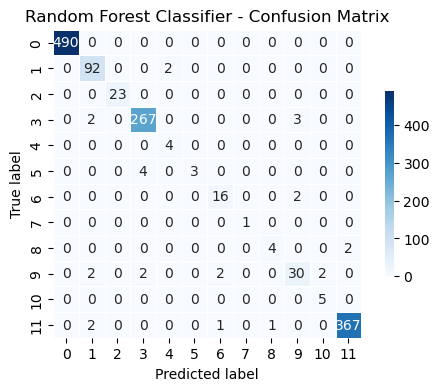


Naive Bayes Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       490
           1       0.08      0.14      0.10        94
           2       0.46      0.48      0.47        23
           3       0.93      0.24      0.38       272
           4       0.01      0.75      0.02         4
           5       0.14      0.43      0.21         7
           6       0.22      0.28      0.24        18
           7       0.05      1.00      0.10         1
           8       0.50      0.67      0.57         6
           9       0.47      0.24      0.32        38
          10       0.05      0.80      0.10         5
          11       0.87      0.29      0.43       371

    accuracy                           0.51      1329
   macro avg       0.40      0.52      0.32      1329
weighted avg       0.82      0.51      0.58      1329

Accuracy: 0.509405568096313


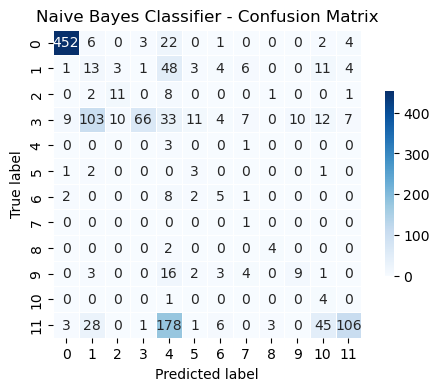


SVM Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       490
           1       0.44      0.80      0.57        94
           2       0.81      0.96      0.88        23
           3       0.90      0.81      0.85       272
           4       0.00      0.00      0.00         4
           5       0.50      0.14      0.22         7
           6       0.44      0.78      0.56        18
           7       0.00      0.00      0.00         1
           8       0.43      1.00      0.60         6
           9       0.69      0.66      0.68        38
          10       0.40      0.80      0.53         5
          11       0.95      0.77      0.85       371

    accuracy                           0.85      1329
   macro avg       0.55      0.64      0.56      1329
weighted avg       0.89      0.85      0.86      1329

Accuracy: 0.8525206922498119


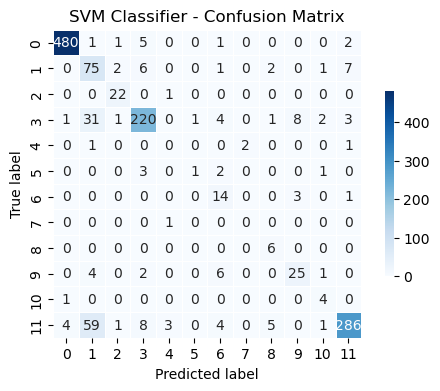


XGBoost Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.98      1.00      0.99        94
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00       272
           4       1.00      1.00      1.00         4
           5       1.00      0.86      0.92         7
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00         1
           8       0.80      0.67      0.73         6
           9       1.00      0.97      0.99        38
          10       0.83      1.00      0.91         5
          11       0.99      1.00      1.00       371

    accuracy                           0.99      1329
   macro avg       0.97      0.95      0.96      1329
weighted avg       0.99      0.99      0.99      1329

Accuracy: 0.9947328818660647
XGBoost model saved.


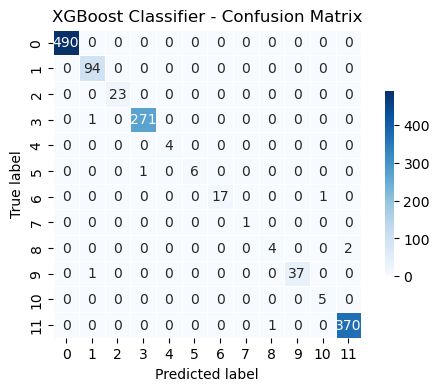


KNN Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       490
           1       0.15      0.31      0.20        94
           2       0.23      0.39      0.29        23
           3       0.63      0.60      0.62       272
           4       0.22      0.50      0.31         4
           5       0.14      0.14      0.14         7
           6       0.09      0.17      0.12        18
           7       0.00      0.00      0.00         1
           8       0.36      0.67      0.47         6
           9       0.36      0.45      0.40        38
          10       0.09      0.20      0.13         5
          11       0.67      0.59      0.63       371

    accuracy                           0.62      1329
   macro avg       0.32      0.40      0.34      1329
weighted avg       0.70      0.62      0.65      1329

Accuracy: 0.6162528216704289


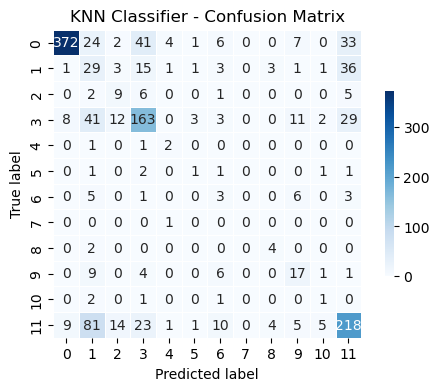


AdaBoost Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00       272
           4       0.31      1.00      0.47         4
           5       0.01      0.86      0.01         7
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        38
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00       371

    accuracy                           0.38      1329
   macro avg       0.11      0.24      0.12      1329
weighted avg       0.37      0.38      0.37      1329

Accuracy: 0.3762227238525207


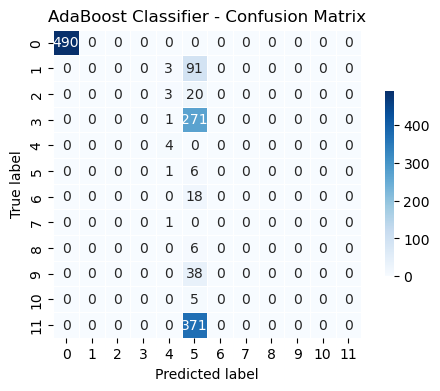

In [88]:
import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


# Define classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(kernel="linear", random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
]

# Define a pipeline for each classifier
pipelines = []
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        (name, classifier)  # Classifier
    ])
    pipelines.append((name, pipeline))

# Fit the models and evaluate
for name, pipeline in pipelines:
    
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)

    # Output classification report and accuracy
    print(f"\n{name} Classifier:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc}")
    
    if name == "XGBoost":
       
        # Save the trained XGBoost model to a file using pickle
        xgboost_model = pipeline.named_steps[name]
        with open('xgboost_model.pkl', 'wb') as model_file:
            pickle.dump(xgboost_model, model_file)
            print(f"{name} model saved.")
            
    if name == "XGBoost":
        with open('trained_pipeline.pkl', 'wb') as file:
            pickle.dump(pipeline, file)        
    

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.6})
    plt.title(f'{name} Classifier - Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    


### Loading Saved Pipeline

In [92]:
import pickle
import xgboost as xgb

# Load the saved XGBoost model from the pickle file
with open('trained_pipeline.pkl', 'rb') as model_file:
    loaded_pipeline = pickle.load(model_file)


In [106]:
X_test.iloc[0]

White Blood Cell Count (WBC)            5.90
Lymphocyte Percentage                  12.00
Monocyte Percentage                     8.70
Neutrophil Percentage                  78.50
Eosinophil Percentage                   0.80
Basophil Percentage                     0.20
Lymphocyte Count                        0.70
Monocyte Count                          0.50
Neutrophil Count                       46.00
Eosinophil Count                        0.20
Basophil Count                          0.10
Red Blood Cell Count (RBC)              5.68
Hemoglobin Level                       17.60
Hematocrit Level                       44.00
Mean Corpuscular Volume (MCV)          89.20
Mean Corpuscular Hemoglobin (MCH)      30.90
Mean Cell Hemoglobin Concentration     34.70
Red Cell Distribution Width (RDW)      14.00
Platelet Count                        128.00
Mean Platelet Volume (MPV)              8.10
Name: 1652, dtype: float64

### Testing a model on a instance

In [114]:
from sklearn.preprocessing import StandardScaler


# Make predictions using the loaded XGBoost model on the scaled data
predictions = loaded_pipeline.predict(X_test.iloc[[0]])

# Print the predictions
print("Actual Value:", y_test[0])
print("Predictions:", predictions[0])


Actual Value: 2
Predictions: 2


## Hypertuning for the pipeline

**Code Details**:
This code performs hyperparameter tuning using Randomized Search CV for a set of classifiers. It defines hyperparameter distributions for each classifier, conducts a randomized search over the specified hyperparameter space, and evaluates the models on the test set. The best hyperparameters for each classifier are printed, along with the classification report and accuracy on the tuned models. Additionally, confusion matrices are displayed to visualize the performance of each tuned classifier on the test set. The number of iterations (n_iter), cross-validation folds (cv), and scoring metric (scoring) are specified, and the computations are parallelized using multiple CPU cores (n_jobs=-1).


Random Forest Classifier - Best Hyperparameters:
{'Random Forest__max_depth': 20, 'Random Forest__n_estimators': 156}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.94      0.99      0.96        94
           2       1.00      1.00      1.00        23
           3       0.98      0.98      0.98       272
           4       0.80      1.00      0.89         4
           5       1.00      0.43      0.60         7
           6       0.88      0.78      0.82        18
           7       1.00      1.00      1.00         1
           8       0.80      0.67      0.73         6
           9       0.81      0.79      0.80        38
          10       0.67      0.80      0.73         5
          11       0.99      0.99      0.99       371

    accuracy                           0.98      1329
   macro avg       0.91      0.87      0.88      1329
weighted avg       0.98      0.98     

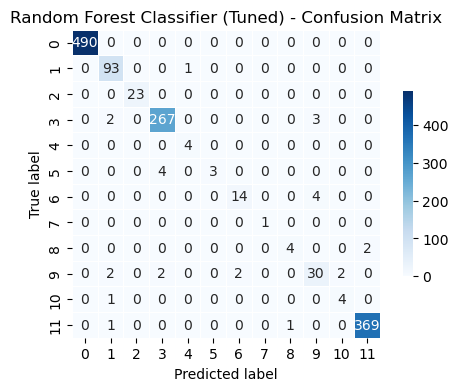


Naive Bayes Classifier - Best Hyperparameters:
{}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       490
           1       0.08      0.14      0.10        94
           2       0.46      0.48      0.47        23
           3       0.93      0.24      0.38       272
           4       0.01      0.75      0.02         4
           5       0.14      0.43      0.21         7
           6       0.22      0.28      0.24        18
           7       0.05      1.00      0.10         1
           8       0.50      0.67      0.57         6
           9       0.47      0.24      0.32        38
          10       0.05      0.80      0.10         5
          11       0.87      0.29      0.43       371

    accuracy                           0.51      1329
   macro avg       0.40      0.52      0.32      1329
weighted avg       0.82      0.51      0.58      1329

Accuracy (Tuned): 0.509405568096313


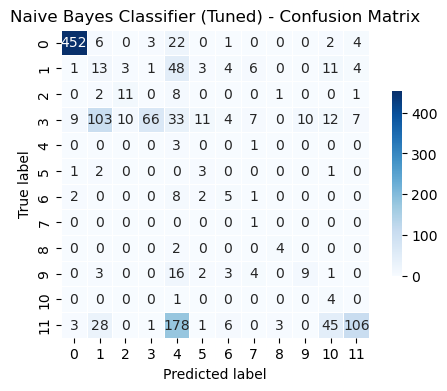


SVM Classifier - Best Hyperparameters:
{'SVM__C': 8.424426408004217, 'SVM__kernel': 'rbf'}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       490
           1       0.44      0.53      0.48        94
           2       0.76      0.57      0.65        23
           3       0.79      0.80      0.80       272
           4       0.50      0.50      0.50         4
           5       0.50      0.14      0.22         7
           6       0.37      0.39      0.38        18
           7       0.00      0.00      0.00         1
           8       0.46      1.00      0.63         6
           9       0.63      0.50      0.56        38
          10       0.20      0.20      0.20         5
          11       0.83      0.81      0.82       371

    accuracy                           0.82      1329
   macro avg       0.54      0.53      0.52      1329
weighted avg       0.82      0.82      0.82      1329

Accuracy (

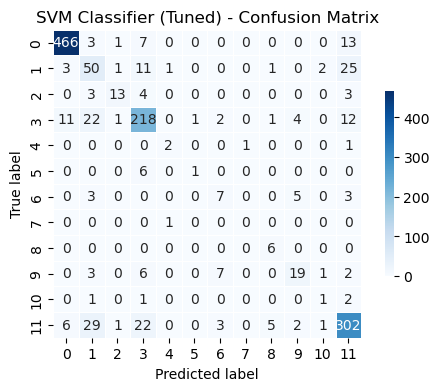


XGBoost Classifier - Best Hyperparameters:
{'XGBoost__max_depth': 3, 'XGBoost__n_estimators': 149}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.96      1.00      0.98        94
           2       1.00      1.00      1.00        23
           3       0.98      1.00      0.99       272
           4       1.00      1.00      1.00         4
           5       1.00      0.43      0.60         7
           6       0.94      0.94      0.94        18
           7       1.00      1.00      1.00         1
           8       0.80      0.67      0.73         6
           9       1.00      0.92      0.96        38
          10       0.75      0.60      0.67         5
          11       0.99      1.00      1.00       371

    accuracy                           0.99      1329
   macro avg       0.95      0.88      0.91      1329
weighted avg       0.99      0.99      0.99      1329

Ac

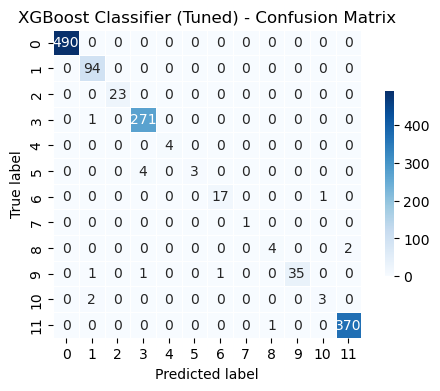


KNN Classifier - Best Hyperparameters:
{'KNN__n_neighbors': 5, 'KNN__p': 1}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       490
           1       0.17      0.30      0.22        94
           2       0.31      0.39      0.35        23
           3       0.66      0.63      0.64       272
           4       0.25      0.50      0.33         4
           5       0.20      0.14      0.17         7
           6       0.17      0.28      0.21        18
           7       0.00      0.00      0.00         1
           8       0.33      0.67      0.44         6
           9       0.47      0.53      0.49        38
          10       0.11      0.20      0.14         5
          11       0.68      0.72      0.70       371

    accuracy                           0.66      1329
   macro avg       0.36      0.42      0.38      1329
weighted avg       0.72      0.66      0.68      1329

Accuracy (Tuned): 0.65613

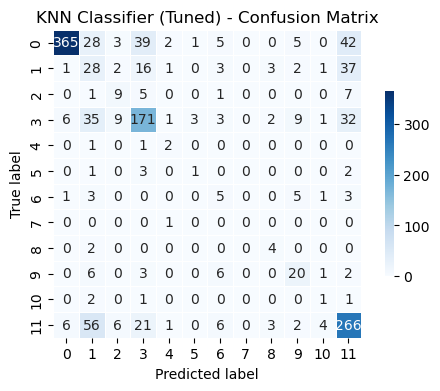


AdaBoost Classifier - Best Hyperparameters:
{'AdaBoost__learning_rate': 0.12058449429580245, 'AdaBoost__n_estimators': 51}
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       0.20      0.81      0.32        94
           2       0.00      0.00      0.00        23
           3       1.00      0.00      0.01       272
           4       0.00      0.00      0.00         4
           5       0.44      0.57      0.50         7
           6       0.52      0.94      0.67        18
           7       1.00      1.00      1.00         1
           8       0.06      0.83      0.11         6
           9       0.67      0.37      0.47        38
          10       0.67      0.40      0.50         5
          11       0.94      0.78      0.85       371

    accuracy                           0.68      1329
   macro avg       0.54      0.56      0.45      1329
weighted avg       0.88      0.68

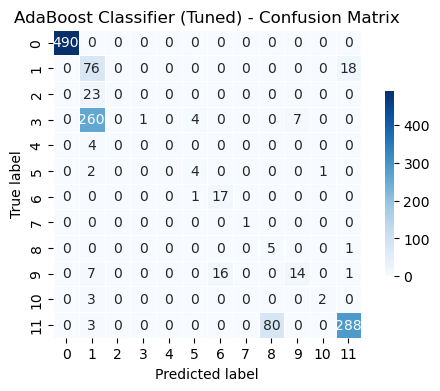

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define hyperparameter distributions for each classifier
param_dists = {
    'Random Forest': {
        'Random Forest__n_estimators': randint(50, 200),
        'Random Forest__max_depth': [None, 10, 20]
    },
    'SVM': {
        'SVM__C': uniform(0.1, 10),
        'SVM__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'XGBoost__n_estimators': randint(50, 200),
        'XGBoost__max_depth': [3, 6, 9]
    },
    'KNN': {
        'KNN__n_neighbors': randint(3, 10),
        'KNN__p': [1, 2]
    },
    'AdaBoost': {
        'AdaBoost__n_estimators': randint(50, 200),
        'AdaBoost__learning_rate': uniform(0.1, 1.0)
    },
}

# Perform randomized search and evaluate models
for name, pipeline in pipelines:
    param_dist = param_dists.get(name, {})  # Get the hyperparameter distribution for the current classifier
    randomized_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    randomized_search.fit(X_train_res, y_train_res)

    # Output best hyperparameters
    print(f"\n{name} Classifier - Best Hyperparameters:")
    print(randomized_search.best_params_)

    # Evaluate on the test set
    y_pred_tuned = randomized_search.predict(X_test)

    # Output classification report and accuracy
    print("Classification Report (Tuned):")
    print(classification_report(y_test, y_pred_tuned))
    acc_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"Accuracy (Tuned): {acc_tuned}")

    # Plot confusion matrix
    conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.6})
    plt.title(f'{name} Classifier (Tuned) - Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


## Model Evaluations before and after hyperparameter tuning

**Initial Model Performance:**

Random Forest Classifier:
Initial Accuracy: 0.9797
Achieved high precision, recall, and F1-score for most classes.

Naive Bayes Classifier:
Initial Accuracy: 0.5094
Struggled with low precision, recall, and F1-score for several classes.

SVM Classifier:
Initial Accuracy: 0.8525
Provided a good balance between precision, recall, and F1-score.

XGBoost Classifier:
Initial Accuracy: 0.9947
Demonstrated excellent performance with high precision, recall, and F1-score.

KNN Classifier:
Initial Accuracy: 0.6163
Showed moderate performance with varying precision, recall, and F1-score.

AdaBoost Classifier:
Initial Accuracy: 0.3762
Demonstrated limited effectiveness with low precision, recall, and F1-score.

**Hyperparameter Tuning:**

Random Forest Classifier (Tuned):
Tuned Accuracy: 0.9797
Minimal improvement, indicating that the initial model was already well-tuned.

Naive Bayes Classifier (Tuned):
Tuned Accuracy: 0.5094
Hyperparameter tuning did not significantly improve the model's performance.

SVM Classifier (Tuned):
Tuned Accuracy: 0.8164
Experienced a slight decrease in accuracy after tuning.

XGBoost Classifier (Tuned):
Tuned Accuracy: 0.9895
Maintained high accuracy and improved precision, recall, and F1-score for some classes.

KNN Classifier (Tuned):
Tuned Accuracy: 0.6561
Hyperparameter tuning led to a moderate improvement in accuracy.

AdaBoost Classifier (Tuned):
Tuned Accuracy: 0.6757
Showed a significant improvement in accuracy, precision, recall, and F1-score for several classes.

<div style="color: #B03060; 
            background-color:  #FFD1DC;
            border: 2px solid #B03060;
            padding: 10px;
            border-radius: 5px;
            font-family: 'Arial', sans-serif;">
    <h1>Conclusion:</h1>
    
    
The XGBoost Classifier initially performed exceptionally well and maintained high accuracy even after hyperparameter tuning, making it a robust choice for this classification task.

Naive Bayes struggled with the complexity of the task, and hyperparameter tuning had limited impact, indicating that the algorithm may not be well-suited for this particular problem.

SVM showed good performance initially but experienced a slight drop in accuracy after hyperparameter tuning. Further fine-tuning or exploration of different kernels may be needed.

Random Forest demonstrated stability, with minimal improvement after hyperparameter tuning, suggesting that the initial configuration was effective.

KNN showed a moderate improvement in accuracy after hyperparameter tuning, but its overall performance remained relatively modest.

AdaBoost showed a significant boost in performance after hyperparameter tuning, indicating that careful parameter selection can enhance its effectiveness.</div>